<a href="https://colab.research.google.com/github/VRAHUL8499/exercise-/blob/main/boston(knn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##KNN exercise on  boston  dataset using regresssion

In [193]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [194]:
boston = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Boston.csv')

In [195]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [196]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [197]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [198]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [199]:
X = boston.drop(['MEDV'],axis = 1 )

In [200]:
y = boston['MEDV']

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7 , random_state = 2529)

In [203]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [204]:
X_train

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
310,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304.0,18.4,350.45,12.64
202,0.02177,82.5,2.03,0,0.415,7.610,15.7,6.2700,2,348.0,14.7,395.38,3.11
76,0.10153,0.0,12.83,0,0.437,6.279,74.5,4.0522,5,398.0,18.7,373.66,11.97
152,1.12658,0.0,19.58,1,0.871,5.012,88.0,1.6102,5,403.0,14.7,343.28,12.12
186,0.05602,0.0,2.46,0,0.488,7.831,53.6,3.1992,3,193.0,17.8,392.63,4.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,0.29819,0.0,6.20,0,0.504,7.686,17.0,3.3751,8,307.0,17.4,377.51,3.92
399,9.91655,0.0,18.10,0,0.693,5.852,77.8,1.5004,24,666.0,20.2,338.16,29.97
316,0.31827,0.0,9.90,0,0.544,5.914,83.2,3.9986,4,304.0,18.4,390.70,18.33
50,0.08873,21.0,5.64,0,0.439,5.963,45.7,6.8147,4,243.0,16.8,395.56,13.45


In [205]:
from sklearn.preprocessing import StandardScaler 

In [206]:
ss = StandardScaler()

In [207]:
X_train = ss.fit_transform(X_train)

In [208]:
X_train

array([[-0.14113619, -0.48175769, -0.19860022, ...,  0.00438903,
        -0.05084503, -0.01555641],
       [-0.42121529,  3.02166196, -1.33410259, ..., -1.68641979,
         0.42969249, -1.33650784],
       [-0.41266839, -0.48175769,  0.22414717, ...,  0.14148164,
         0.19739169, -0.10842497],
       ...,
       [-0.38944304, -0.48175769, -0.19860022, ...,  0.00438903,
         0.37963873,  0.77313338],
       [-0.41404001,  0.41002186, -0.81324318, ..., -0.72677154,
         0.43161763,  0.09671754],
       [-0.41578561,  2.06618387, -1.3831586 , ..., -0.04130851,
         0.39707198, -0.68781395]])

In [209]:
X_test = ss.fit_transform(X_test)

In [210]:
from sklearn.neighbors import KNeighborsRegressor 

In [211]:
knnreg = KNeighborsRegressor(n_neighbors=3)

In [212]:
knnreg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [213]:
y_pred = knnreg.predict(X_test)

In [214]:
y_pred

array([32.46666667, 21.23333333, 19.3       , 47.7       , 18.        ,
       24.2       , 17.8       , 14.9       , 20.66666667, 19.        ,
       18.83333333, 28.4       , 25.56666667,  8.73333333, 12.26666667,
       24.06666667, 20.73333333, 25.43333333, 12.36666667, 37.43333333,
       21.93333333, 14.5       , 13.6       , 21.33333333, 24.76666667,
       19.83333333, 20.33333333, 22.        , 24.9       , 20.36666667,
       14.86666667, 16.8       , 21.06666667, 21.46666667, 47.7       ,
       23.46666667, 48.        , 23.7       , 41.26666667, 16.4       ,
       13.26666667, 19.93333333,  9.        , 14.46666667, 22.33333333,
       29.83333333, 15.3       , 14.76666667, 15.5       , 19.23333333,
       27.2       , 31.06666667, 16.8       , 19.36666667, 20.5       ,
       19.23333333, 47.3       , 19.2       , 19.6       , 26.        ,
       30.43333333, 16.26666667, 20.73333333, 39.3       , 25.66666667,
       28.76666667, 12.36666667, 32.93333333, 19.63333333, 16.73

In [215]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [216]:
mean_absolute_error(y_test,y_pred)

2.5309210526315793

In [217]:
mean_absolute_percentage_error(y_test,y_pred)

0.12289250095895413

In [218]:
error_rate = []
for i in range(1,40):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train , y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(mean_absolute_error(y_test,pred_i))

In [219]:
error_rate

[3.134210526315789,
 2.795065789473684,
 2.5309210526315793,
 2.5592105263157894,
 2.672894736842105,
 2.6517543859649124,
 2.7910714285714286,
 2.8222039473684206,
 2.8627192982456138,
 2.8897368421052634,
 2.9014952153110047,
 2.9251644736842106,
 2.9426619433198375,
 2.87687969924812,
 2.9153070175438596,
 2.943215460526315,
 2.928405572755418,
 2.9784722222222215,
 2.960560941828255,
 2.972763157894736,
 2.9944235588972425,
 3.029186602870813,
 3.02883295194508,
 3.0328673245614035,
 3.0655,
 3.0812500000000003,
 3.080750487329435,
 3.117763157894737,
 3.128493647912886,
 3.137214912280702,
 3.133000848896435,
 3.1576685855263156,
 3.1555223285486447,
 3.1607972136222906,
 3.1681766917293235,
 3.1903508771929823,
 3.192247510668563,
 3.2162049861495845,
 3.2415485829959514]

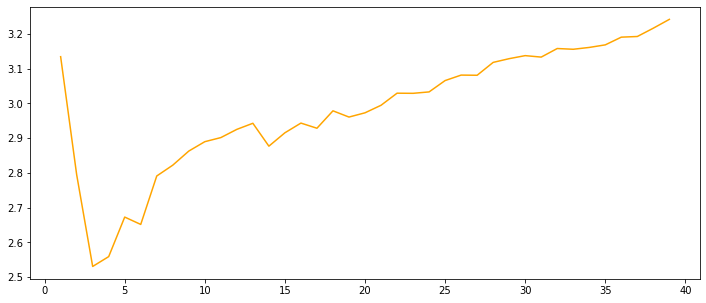

In [220]:
fig, ax = plt.subplots(figsize = (12,5))
ax.plot(range(1,40),error_rate, c= 'Orange')

Summary : k  value should be taken as  '3' since least error in kkn number range 